## Mallet-TM : 
### Extract Topic Model with LdaMallet from KCC News and CIS test data

In [1]:
# -*- coding: utf-8 -*-
'''
Input: "KCC Data/CkipNewsCis18850-KccDict2020.txt"
Output: "KCC Data/NewsCisTest-KccDict2020-MalletNum20.txt"

@author: johnson
'''
from gensim import corpora, models, utils
from gensim.models import LdaModel
from gensim.models import CoherenceModel

### read data from txt file, and tokenize words, clean-up text

In [2]:
fList = []
with open("C:/Users/Bear/Downloads/sister/KCC Data/CkipNewsCis18850-KccDict2020.txt","r", encoding='utf-8-sig') as files:
     for file in files:
        #simple_preprocess: tokenize,去除標點 - gensim.utils.simple_preprocess(doc, deacc=False, min_len=2, max_len=15)
        fList.append(list(utils.simple_preprocess(file, deacc=True, min_len=2,)))
print("fList[:1] = ", fList[:1])
print("------------------------------")

fList[:1] =  [['馬英九', '昨天', '上午', '視察', '衛武營藝術文化中心', '文化部', '洪孟啟', '工程', '副主委', '顏久榮', '高雄市', '副市長', '吳宏謀', '一同', '到場', '聽取', '衛武營', '興建', '工程', '簡報', '瞭解', '工程進度', '執行', '情形', '完成', '百分之九十五', '工程進度', '共計', '投入', '新臺幣', '一百零五億八千萬', '經費', '預計', '六月', '竣工', '明年', '開館', '營運', '目標', '馬英九', '指出', '衛武營', '案子', '九十四年', '編列', '預算', '核定', '施工', '正式', '完工', '時間', '長達', '十三', '原先', '預計', '故宮', '南院', '工程', '單位', '部門', '克服', '困難', '值得', '檢討', '總統', '致詞', '民國', '九十九年', '主持', '動土', '典禮', '原從', '黃土', '生長出', '有如', '魟魚', '悠遊', '海浪', '建築', '實在', '驚豔', '過程', '包含', '團隊', '付出', '努力', '籌建', '過程', '艱辛', '各界', '關注', '投入', '新建', '工程', '幾近', '完工', '特別', '肯定', '文化部', '籌建', '過程', '付出', '辛勞', '高雄市政府', '各界', '支持', '配合', '總統', '文化', '城市', '期許', '衛武營藝術文化中心', '臺灣', '藝術', '力量', '南方', '集結地', '臺北', '國家兩廳院', '臺中', '國家歌劇院', '攜手', '並進', '打造', '台灣', '國際', '藝文', '版圖', '地標', '文化部', '洪孟啟', '衛武營', '考驗', '面臨', '營運', '壓力', '文化部', '衛武營', '南部', '高雄市文化中心', '嘉義', '文化', '園區', '故宮', '南院', '台南', '地方', '藝文', '團體', '高雄大東文化藝術中心', '屏東', '演藝廳'

### creat dictionary for corpus

In [3]:
# creat a unique id for each word segment
dict = corpora.Dictionary(list(fList))
print("dict = ", dict)
print("------------------------------")

dict =  Dictionary(113533 unique tokens: ['一同', '一百零五億八千萬', '上午', '並進', '主持']...)
------------------------------


### creat corpus need for Topic Modeling

In [4]:
# creat mapping matrix of [word_id, word_frequency] for each word segment
corpus = [dict.doc2bow(text) for text in fList]   
print("corpus[:1] = ", corpus[:1])  
print("================================================")

print("print lists of [word:frequency]")
[[print((dict[id], freq)) for id,freq in cp] for cp in corpus[:1]]
print("======================================================")

corpus[:1] =  [[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 3), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 3), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 1), (50, 1), (51, 4), (52, 2), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 4), (70, 5), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 2), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 2), (102, 1), (103, 1), (104, 1), (105, 1), (106, 2), (107, 1), (108, 1), (109

### building the Topic Model from MALLET
#### enviroment setting for Mallet LDA: https://programminghistorian.org/en/lessons/topic-modeling-and-mallet#installing-mallet

In [5]:
mallet_path = "C://mallet/bin/mallet"
ldamal = models.wrappers.LdaMallet(mallet_path, corpus=corpus, id2word=dict, num_topics=20)
output = open("C:/Users/Bear/Downloads/sister/KCC Data/NewsCisTest-KccDict2020-MalletNum20.txt", 'w', encoding='utf-8-sig')

#print(ldamal.show_topics(formatted=False))
# 列出最重要的前若干个主题
lsTM = ldamal.show_topics(num_topics=20, num_words=20, log=False, formatted=False)
for tupleTM in lsTM:
        str1 = "".join(str(x) for x in tupleTM)
        #print("type(str1) = ", type(str1))
        str1 += "\n"
        print("strTM = ", str1)
        output.write(str1)
output.close()
 
#  print("------------------------------")
#  print("Perplexity = ", ldamal.log_perplexity(corpus))

print("------------------------------")
cm = models.CoherenceModel(model=ldamal, texts=list(fList), dictionary= dict, coherence= 'c_v')
coher_lda = cm.get_coherence()
print("\n Coherence Score: ", coher_lda)


strTM =  0[('發生', 0.013957823985870463), ('高雄市政府警察局', 0.011251298069453871), ('人員', 0.010817926850208917), ('民眾', 0.01049085423191084), ('警方', 0.009534166823388963), ('警察', 0.008160461826537038), ('電話', 0.0077434442382069875), ('發現', 0.0074000179889940065), ('現場', 0.00661504370507862), ('單位', 0.005960898468482465), ('高市', 0.005740124451131263), ('員警', 0.005494819987407704), ('違規', 0.005241338708226694), ('消防', 0.0052086314463968865), ('檢舉', 0.005135040107279819), ('監視器', 0.005028741506332943), ('事件', 0.004807967488981741), ('消防局', 0.004505425317056019), ('治安', 0.0044236571624815), ('小時', 0.004284651299704817)]

strTM =  1[('登革熱', 0.019700910273081924), ('高雄市', 0.017982537618428385), ('工作', 0.01488017833921605), ('民眾', 0.012195801597622144), ('疫情', 0.011545606539104589), ('鄭新助', 0.011201932008173881), ('衛生局', 0.009994426899498421), ('醫療', 0.008898383800854542), ('醫院', 0.00871261378413524), ('人員', 0.008396804755712427), ('昨天', 0.007709455693851013), ('防疫', 0.007495820174623816), ('市民', 0


 Coherence Score:  0.5807141940585333


### Finding the optimal number of topics

In [6]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    # global mallet_path, dict
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dict)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        coher = coherencemodel.get_coherence()
        print("Num_topics: ", num_topics, " Coherence Score= ", coher)
    return model_list, coherence_values

In [7]:
lim=36; sta=3; ste=3;
model_list, coherence_values = compute_coherence_values(dictionary=dict, corpus=corpus, texts=list(fList), limit=lim, start=sta, step=ste)

Num_topics:  3  Coherence Score=  0.47358370925074605
Num_topics:  6  Coherence Score=  0.5267588118415526
Num_topics:  9  Coherence Score=  0.5180819783075346
Num_topics:  12  Coherence Score=  0.5216517167915496
Num_topics:  15  Coherence Score=  0.5796608315178363
Num_topics:  18  Coherence Score=  0.5945362808867811
Num_topics:  21  Coherence Score=  0.5915291816690509
Num_topics:  24  Coherence Score=  0.5958245783531176
Num_topics:  27  Coherence Score=  0.6084210231175133
Num_topics:  30  Coherence Score=  0.5983970333672769
Num_topics:  33  Coherence Score=  0.6194989189099164


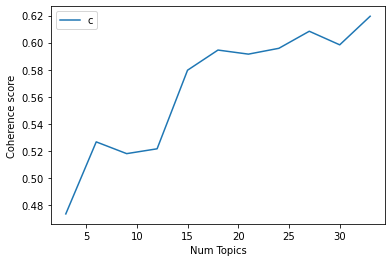

In [8]:
# Show graph
import matplotlib.pyplot as plt

limit=lim; start=sta; step=ste;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [9]:
# Print the coherence scores
optNum = 0
maxCV = 0
for m, cv in zip(x, coherence_values):
    # maxCV = lambda cv, maxCV: cv if cv > maxCV else maxCV
    if cv > maxCV:
        optNum = m
        maxCV = cv 
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
print("Optimal Topic Num =", optNum, " Highest Value =", maxCV)

Num Topics = 3  has Coherence Value of 0.4736
Num Topics = 6  has Coherence Value of 0.5268
Num Topics = 9  has Coherence Value of 0.5181
Num Topics = 12  has Coherence Value of 0.5217
Num Topics = 15  has Coherence Value of 0.5797
Num Topics = 18  has Coherence Value of 0.5945
Num Topics = 21  has Coherence Value of 0.5915
Num Topics = 24  has Coherence Value of 0.5958
Num Topics = 27  has Coherence Value of 0.6084
Num Topics = 30  has Coherence Value of 0.5984
Num Topics = 33  has Coherence Value of 0.6195
Optimal Topic Num = 33  Highest Value = 0.6194989189099164


###  Select the model and print the topics

In [10]:
from pprint import pprint

optimal_model = model_list[5]
# model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=25))

[(0,
  '0.078*"高雄" + 0.026*"高雄市" + 0.023*"產業" + 0.022*"城市" + 0.019*"發展" + '
  '0.013*"台灣" + 0.013*"經濟" + 0.009*"推動" + 0.009*"國際" + 0.009*"機會" + 0.008*"投資" '
  '+ 0.007*"包括" + 0.007*"合作" + 0.006*"第一" + 0.006*"努力" + 0.006*"高雄市政府" + '
  '0.005*"更多" + 0.005*"就業" + 0.005*"透過" + 0.005*"建設" + 0.005*"人口" + '
  '0.005*"年輕人" + 0.005*"國家" + 0.005*"資源" + 0.004*"政策"'),
 (1,
  '0.026*"台灣" + 0.020*"總統" + 0.018*"陳菊" + 0.015*"民主進步黨" + 0.015*"蔡英文" + '
  '0.013*"政治" + 0.009*"陳水扁" + 0.007*"昨天" + 0.007*"政府" + 0.007*"執政" + '
  '0.007*"立法院" + 0.006*"媒體" + 0.006*"支持" + 0.006*"民主" + 0.006*"馬英九" + '
  '0.006*"高雄" + 0.005*"出席" + 0.005*"行政院" + 0.005*"國家" + 0.005*"鄭新助" + '
  '0.005*"賴清德" + 0.005*"中國" + 0.004*"代表" + 0.004*"社會" + 0.004*"柯文哲"'),
 (2,
  '0.054*"市長" + 0.053*"陳菊" + 0.036*"議員" + 0.027*"議會" + 0.025*"高雄市" + '
  '0.022*"市民" + 0.021*"市府" + 0.016*"康裕成" + 0.015*"團隊" + 0.011*"高雄市議會" + '
  '0.011*"質詢" + 0.010*"許崑源" + 0.010*"議長" + 0.009*"副市長" + 0.008*"市政" + '
  '0.007*"首長" + 0.007*"陳美雅" + 0.006*"尊重" + 0.006*"責任" 

### Finding the dominant topic in each sentence

In [11]:
import pandas as pd

# Finding the dominant topic in each sentence
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamal, corpus=corpus, texts=list(fList))

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,7.0,0.2620,"觀光, 文化, 高雄, 規劃, 文化局, 歷史, 觀光局, 旗津, 遊客, 特色","[馬英九, 昨天, 上午, 視察, 衛武營藝術文化中心, 文化部, 洪孟啟, 工程, 副主委..."
1,1,3.0,0.1793,"總統, 韓國瑜, 民主進步黨, 台灣, 蔡英文, 政治, 高雄, 中國國民黨, 陳水扁, 媒體","[日本, 九州熊本, 接連, 強震, 襲擊, 台灣, 捐贈, 熊本, 縣政府, 日本, 政府..."
2,2,14.0,0.2853,"活動, 舉辦, 民眾, 參加, 現場, 高雄, 昨天, 台灣, 邀請, 參與","[壽山動物園, 增進, 動物飼養, 福祉, 保育, 工作, 設立, 高雄市壽山動物園動物認養..."
3,3,17.0,0.2568,"陳菊, 市府, 市長, 市民, 高雄市, 政府, 責任, 氣爆, 團隊, 表達","[日本, 熊本地震, 災情, 慘重, 高雄市, 陳菊, 昨天, 率先, 捐出, 一月, 所得..."
4,4,5.0,0.3518,"高雄, 產業, 高雄市, 台灣, 城市, 發展, 經濟, 國際, 機會, 推動","[睽違, 超過, 世紀, 緬甸, 官方, 代表, 包含, 緬甸, 聯邦, 議會, 議員, 美..."
5,5,5.0,0.3382,"高雄, 產業, 高雄市, 台灣, 城市, 發展, 經濟, 國際, 機會, 推動","[高雄, 翻轉, 政府, 力挺, 高雄市, 陳菊, 日前, 高雄市議會, 施政報告, 指出,..."
6,6,5.0,0.6087,"高雄, 產業, 高雄市, 台灣, 城市, 發展, 經濟, 國際, 機會, 推動","[高雄市, 陳菊, 前往, 東台, 精機, 參訪, 高雄, 鼓勵, 傳統, 產業, 升級, ..."
7,7,9.0,0.3510,"交通, 交通局, 捷運, 高雄輕軌, 民眾, 公車, 規劃, 機車, 運輸, 路線","[交通局, 委託, 民間, 公司, 民調, 昨天, 公布, 民調, 搭乘, 公車, 民眾, ..."
8,8,14.0,0.4788,"活動, 舉辦, 民眾, 參加, 現場, 高雄, 昨天, 台灣, 邀請, 參與","[臺灣塑膠工業股份有限公司, 企業, 回饋, 地方, 藝文, 活動, 週六, 晚間, 高雄市..."
9,9,4.0,0.3217,"立委, 民主進步黨, 中國國民黨, 支持, 選區, 議員, 參選, 選舉, 候選人, 競選","[中國國民黨, 分區, 立委, 陳宜民, 鳳山, 地區, 成立, 聯合, 服務處, 日前, ..."


### Find the most representative document for each topic

In [12]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()
print("------------------------------")
sent_topics_sorteddf_mallet[:10]

------------------------------


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.6838,"發生, 高雄市政府警察局, 人員, 民眾, 警方, 警察, 電話, 發現, 現場, 單位","[記者, 黃建華, 黃佳琳, 王榮祥, 高雄, 現場, 直擊, 昨天, 清晨, 五點, 高雄..."
1,1.0,0.7143,"登革熱, 高雄市, 工作, 民眾, 疫情, 鄭新助, 衛生局, 醫療, 醫院, 人員","[九月, 九日, 高雄市, 累計, 本土, 登革熱, 病例, 八百四十五, 日前, 高雄市,..."
2,2.0,0.7467,"議員, 議長, 選舉, 高雄市議會, 調查, 指出, 投票, 議會, 當選, 法院","[最高法院, 昨天, 駁回, 檢察, 總長, 顏大和, 九十九年, 高雄市議長, 選舉, 亮..."
3,3.0,0.5604,"總統, 韓國瑜, 民主進步黨, 台灣, 蔡英文, 政治, 高雄, 中國國民黨, 陳水扁, 媒體","[小英, 政府, 人事, 佈局, 政壇, 媒體, 關注, 焦點, 名單, 媒體, 目前, 財..."
4,4.0,0.7673,"立委, 民主進步黨, 中國國民黨, 支持, 選區, 議員, 參選, 選舉, 候選人, 競選","[高屏, 縣市, 立委, 選情, 綠油油, 民主進步黨, 可望, 高雄市, 席次, 五望六,..."
5,5.0,0.6705,"高雄, 產業, 高雄市, 台灣, 城市, 發展, 經濟, 國際, 機會, 推動","[台灣網路暨電子商務產業發展協會, tiea, 昨天, 年度, 大會, 產業, 高峰, 論壇..."
6,6.0,0.6314,"高雄市政府環境保護局, 中國石油, 污染, 公司, 管線, 居民, 工廠, 石化, 環境, 工業區","[中國石油, 公司, 原本, 昨天, 後勁, 居民, 提出, 高雄, 煉油, 總廠, 遷移,..."
7,7.0,0.6750,"觀光, 文化, 高雄, 規劃, 文化局, 歷史, 觀光局, 旗津, 遊客, 特色","[高雄市政府海洋局, 高雄港, 蚵仔寮, 興達港, 安平, 藍色公路, 近日, 推出, 高雄..."
8,8.0,0.7227,"申請, 相關, 政府, 勞工, 業者, 大樓, 民眾, 公告, 高雄市, 黃淑美","[房屋, 課稅, 對象, 處長, 本席, 想要, 請問, 房子, 制定, 繳交, 房屋稅, ..."
9,9.0,0.6600,"交通, 交通局, 捷運, 高雄輕軌, 民眾, 公車, 規劃, 機車, 運輸, 路線","[改善, 鼎金, 系統, 交流道, 週邊, 交通, 壅塞, 高市府, 重新, 啟動, 國道,..."


###  Showing topic distribution across documents

In [13]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,7.0,"觀光, 文化, 高雄, 規劃, 文化局, 歷史, 觀光局, 旗津, 遊客, 特色",863.0,0.0458
1.0,3.0,"總統, 韓國瑜, 民主進步黨, 台灣, 蔡英文, 政治, 高雄, 中國國民黨, 陳水扁, 媒體",610.0,0.0324
2.0,14.0,"活動, 舉辦, 民眾, 參加, 現場, 高雄, 昨天, 台灣, 邀請, 參與",774.0,0.0411
3.0,17.0,"陳菊, 市府, 市長, 市民, 高雄市, 政府, 責任, 氣爆, 團隊, 表達",1195.0,0.0634
4.0,5.0,"高雄, 產業, 高雄市, 台灣, 城市, 發展, 經濟, 國際, 機會, 推動",1837.0,0.0975
...,...,...,...,...
18845.0,15.0,"市長, 局長, 議員, 裡面, 真的, 本席, 答覆, 市政府, 回答, 辦法",NaN,NaN
18846.0,16.0,"學校, 學生, 教育局, 教育, 孩子, 老師, 家長, 大學, 校長, 國中",NaN,NaN
18847.0,11.0,"道路, 工程, 工務局, 水利局, 公園, 改善, 完成, 經費, 排水, 單位",NaN,NaN
18848.0,15.0,"市長, 局長, 議員, 裡面, 真的, 本席, 答覆, 市政府, 回答, 辦法",NaN,NaN
